In [1]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = 'Mall_Customers.csv'
df = pd.read_csv(data, sep=',', encoding='utf-8', dtype=str)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null object
Gender                    200 non-null object
Age                       200 non-null object
Annual Income (k$)        200 non-null object
Spending Score (1-100)    200 non-null object
dtypes: object(5)
memory usage: 7.9+ KB


In [4]:
df['Age'] = df['Age'].astype("int")
df['Annual Income (k$)'] = df['Annual Income (k$)'].astype("int")
df['Spending Score (1-100)'] = df['Spending Score (1-100)'].astype("int")

In [5]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
df['Age'].mean()

38.85

In [7]:
#男女比例
gender_df = df.groupby("Gender")['CustomerID'].agg({'gender_count':'count'})
gender_df

,gender_count
Gender,
Female,112
Male,88


In [8]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

([<matplotlib.patches.Wedge at 0x19664c42518>,
 [Text(-1.08052,0.206119,'男性'), Text(1.08052,-0.206119,'女性')],
 [Text(-0.589372,0.112429,'44%'), Text(0.589372,-0.112429,'56%')])

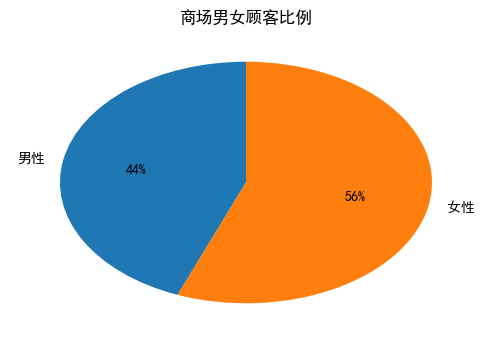

In [9]:
male_user = gender_df.loc['Male', 'gender_count']
female_user = gender_df.loc['Female', 'gender_count']

labels = ['男性', '女性']
y = [male_user, female_user]

fig = plt.figure(dpi=100)
plt.title("商场男女顾客比例")
plt.pie(y, labels=labels, autopct='%1.0f%%',startangle=90)#图旋转角度

In [10]:
gender_df = df.groupby("Gender")['Spending Score (1-100)'].agg({'avg_score':'mean'})
gender_df

,avg_score
Gender,
Female,51.526786
Male,48.511364


<BarContainer object of 2 artists>

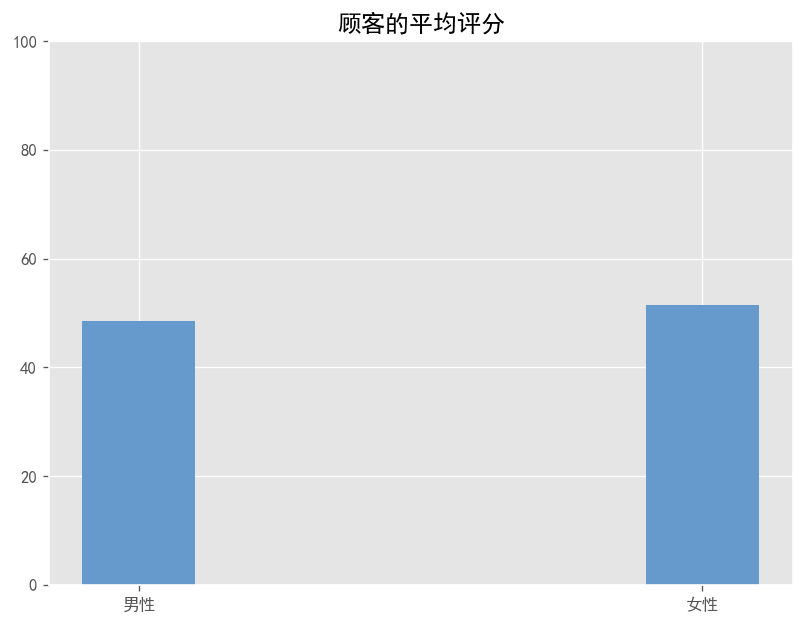

In [11]:
male_score = gender_df.loc['Male', 'avg_score']
female_score = gender_df.loc['Female', 'avg_score']

x = ['男性', '女性']
y = [male_score, female_score]

plt.figure(figsize=(8,6), dpi=120)
plt.style.use("ggplot")
plt.title("顾客的平均评分")
plt.ylim(ymin=0, ymax=100)
plt.bar(x, y, width=0.2, color='#6699CC')

In [12]:
def age_group(age):
    if age<20:
        return '1'
    elif age<40:
        return '2'
    elif age<60:
        return '3'
    else:
        return '4'

In [13]:
df_2 = df.copy()
df_2['age_group'] = df_2['Age'].apply(age_group)
df_2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),age_group
0,1,Male,19,15,39,1
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [14]:
income_df = df_2.groupby('age_group')['Annual Income (k$)'].agg({"avg_income":'mean'})
income_df

,avg_income
age_group,
1,55.083333
2,62.596154
3,61.890625
4,49.000000


<BarContainer object of 4 artists>

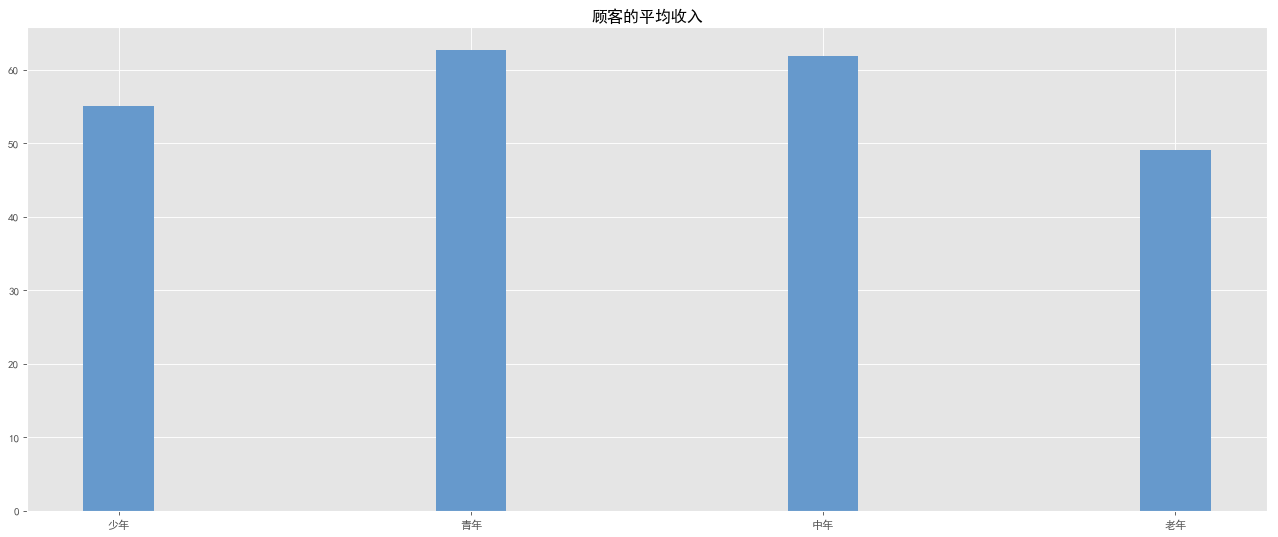

In [15]:
x = ['少年','青年','中年','老年']
y = income_df['avg_income']

plt.figure(figsize=(20,8), dpi=80)
plt.style.use('ggplot') #使用自带格式美化
plt.title("顾客的平均收入")
plt.bar(x, y, width=0.2, color='#6699CC')